# Belly Button Demographics Panel

Let's first look at the index.html document Roza will need by downloading a zip file containing the HTML file.

Download the file

## Set Up HTML Elements

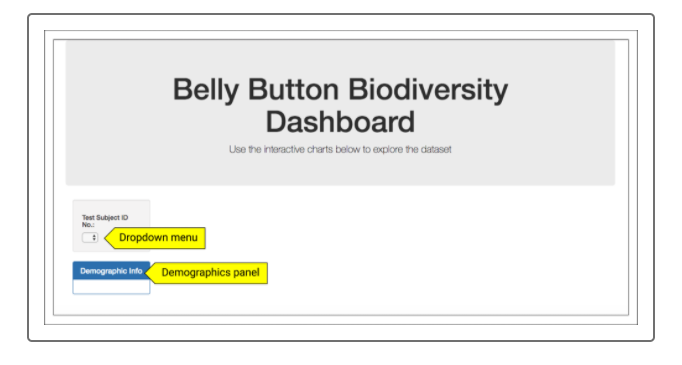

This is a Bootstrap page with a dropdown menu and an info panel. Selecting an ID number from the dropdown menu will populate the panel with that person's information.

Open index.html to examine the code. As expected, the header links to the Bootstrap CDN.

In [ ]:
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <meta http-equiv="X-UA-Compatible" content="ie=edge">
  <title>Belly Button Biodiversity</title>
  <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css">
</head>

The next block of code creates two HTML elements: the dropdown menu and the panel for the demographic information.

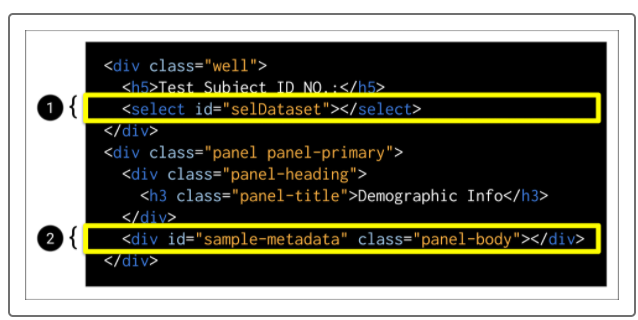

In this code, there are two key things to highlight:

A <div> belonging to the well class contains a dropdown menu with an id of selDataset.

A <div> with an id of sample-metadata is the information panel.

The dropdown menu doesn't have any options yet, and the panel doesn't contain any demographic information. These will be dynamically generated with information from the dataset.

We'll use the data from samples.json to create a dropdown menu of volunteer (test subject) ID numbers dynamically:

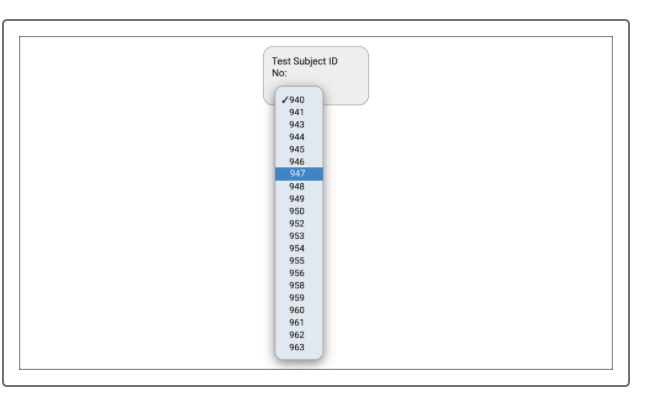

# Dynamically Generate Dropdown Menu Items
Let's examine the code that creates a dropdown menu of ID numbers dynamically.

In [ ]:
function init() {
  var selector = d3.select("#selDataset");

  d3.json("samples.json").then((data) => {
    console.log(data);
    var sampleNames = data.names;
    sampleNames.forEach((sample) => {
      selector
        .append("option")
        .text(sample)
        .property("value", sample);
    });
})}

init();

Let's break down what this code is doing:

All the code is enclosed inside the init() function, which is called on the last line.

Insideinit(), the d3.select() method is used to select the dropdown menu, which has an id of #selDataset. The dropdown menu is assigned to the variable selector.

The d3.json() method is used to read the data from samples.json. The data from the entire JSON file is assigned the (arbitrary) argument name data.

Inside the data object, the names array, as seen from console.log(data), contains the ID numbers of all the study participants. The variable sampleNames is assigned to this array.

Open the browser console to examine the names array. As expected, it is an array of ID numbers.

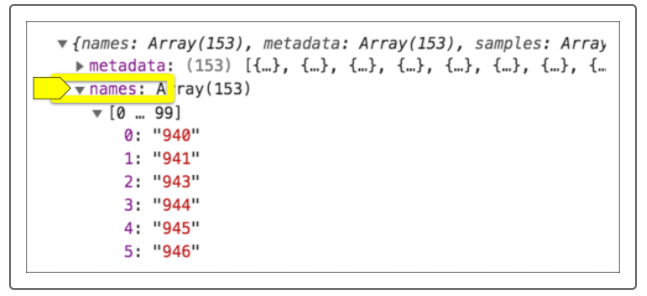

In this code, note that the forEach() method is called on the sampleNames array. For each element in the array, a dropdown menu option is appended. The text of each dropdown menu option is the ID. Its value property is also assigned the ID.

For example, ID "940" is the first element of the sampleNames array. As the forEach() method iterates over the first element of the array, a menu option is appended to the dropdown menu. It is then given the text (the text seen in the dropdown menu) "940", and its property is also assigned "940". The forEach() method will perform the same tasks for the next element of the array, "941".

Up to this point, the dropdown menu examples we have seen had hard-coded menu options. For example, in the code below, there are two dropdown menu options, for which each value property can be selected with JavaScript:

In [ ]:
  <select id="dropdownMenu">
    <option value="dataset1">DataSet1</option>
    <option value="dataset2">DataSet2</option>
  </select>

With the belly button data, the dropdown menu options are generated dynamically. However, the HTML code can be modified to call a JavaScript function:

In [ ]:
<select id="selDataset" onchange="optionChanged(this.value)"></select>

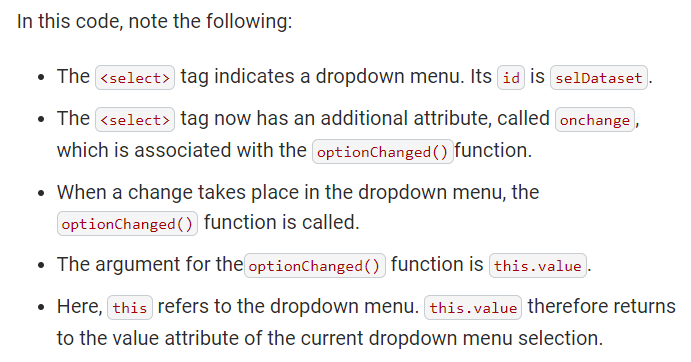

## REWIND
The JavaScript keyword this is used to access the object in question. In the context of an event, it refers to the HTML element that received the event. In this case, this refers to the dropdown menu.

Since the function optionChanged() does not yet exist in plots.js, let's add it:

In [ ]:
function optionChanged(newSample) {
  console.log(newSample);
}

It takes in an argument, named newSample, and logs it to the browser console. Note the following:

This function is declared in plots.js, but it is never called in plots.js. It's instead called by the onchange attribute of the dropdown menu in index.html. Compare this to the init() function, which is both declared and called inplots.js.

The argument name newSample refers to the value of the selected menu option. In index.html, onchange=optionChanged(this.value)passes the selected menu option's value to the optionChanged()function. This function gives this information the argument name newSample. In other words,this.value and newSample are equivalent.

When an option is selected from the menu, its value is printed to the browser console:

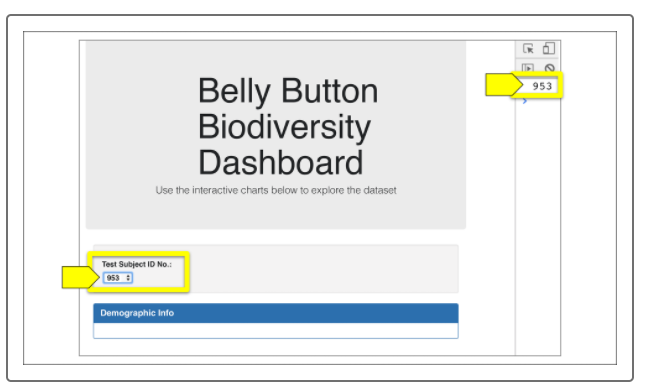

The next task is to print information to the Demographic Infopanel: once a user selects an ID number, the associated volunteer's demographic information needs to be filtered from samples.json and placed in the panel.

When a change takes place to the dropdown menu, two things will need to occur:

The demographic information panel is populated with a specific volunteer's information.

The volunteer's data is visualized in a separate div.

These tasks should be modularized—that is, the code statements required to perform each task should be packaged as a separate function. When a change takes place to the dropdown menu, each function should be called. Notice that in the optionChanged() function, console.log(newSample); has been replaced with two function calls:

In [ ]:
function optionChanged(newSample) {
  buildMetadata(newSample);
  buildCharts(newSample);
}

Recall that optionChanged() is called from the HTML document and, in turn, calls buildMetadata() and buildCharts(). The argument, newSample, is the volunteer ID number that is passed to both of these functions. These two functions will use the ID number to create that specific individual's information panel and charts, respectively.

Let's now declare the first of these functions: buildMetadata().

In [ ]:
function buildMetadata(sample) {
  d3.json("samples.json").then((data) => {
    var metadata = data.metadata;
    var resultArray = metadata.filter(sampleObj => sampleObj.id == sample);
    var result = resultArray[0];
    var PANEL = d3.select("#sample-metadata");

    PANEL.html("");
    PANEL.append("h6").text(result.location);
  });

Here's a breakdown of what's happening in this code:

The function buildMetadata() takes in sample, or an ID number, as its argument. That is, when a dropdown menu option is selected, the ID number is passed in as sample.

Then d3.json() pulls in the entire dataset contained in samples.json. Once the dataset is read in, it is referred to as data.
The metadata array in the dataset (data.metadata) is assigned the variable metadata.

Then the filter() method is called on the metadata array to filter for an object in the array whose id property matches the ID number passed into buildMetadata() as sample. Recall that each object in the metadata array contains information about one person.

Because the results of the filter() method are returned as an array, the first item in the array (resultArray[0]) is selected and assigned the variable result.

The id of the Demographic Info panel is sample-metadata. The d3.select() method is used to select this <div>, and the variable PANEL is assigned to it.
    
PANEL.html("") ensures that the contents of the panel are cleared when another ID number is chosen from the dropdown menu.
    
Finally, the append() and text() methods are chained to append a H6 heading to the panel and print the location of the volunteer to the panel, respectively.

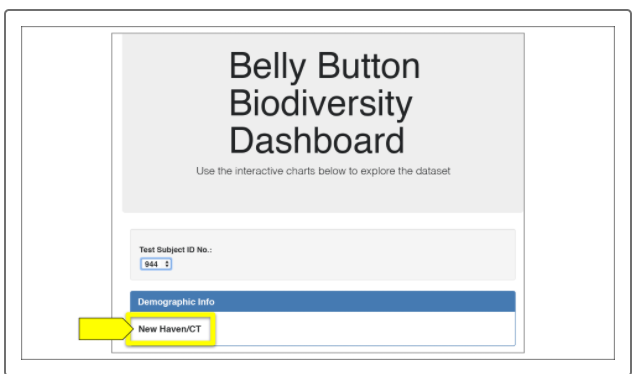

Which JavaScript method is used to iterate through the keys and values of an object? object.entries()

Which data structure type is returned by the Object.entries() method? Array